In [21]:
#importing the necessary modules
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
from keras.datasets import mnist

In [22]:
#loading data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
# Split into training and val set
from sklearn.model_selection import train_test_split

xtrain, xval, ytrain, yval = train_test_split(xtrain,ytrain, test_size = 0.2, random_state=42)

Training data:


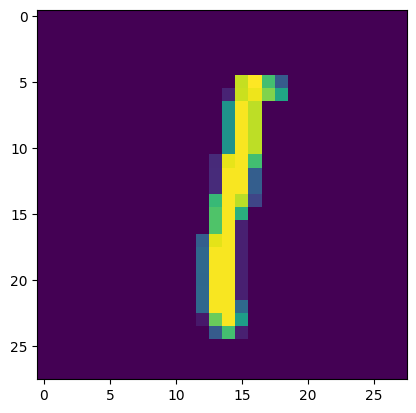

Label of this image is 1


In [23]:
#What mnist images look like
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[4])
plt.show()
print("Label of this image is",ytrain[4])

In [24]:
#reshaping data as needed by the model
xtrain=np.reshape(xtrain,(-1,28,28,1))
xval=np.reshape(xval,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xval.shape,xtest.shape,ytrain.shape,yval.shape,ytest.shape

((48000, 28, 28, 1),
 (12000, 28, 28, 1),
 (10000, 28, 28, 1),
 (48000,),
 (12000,),
 (10000,))

In [25]:
#normalising
x_train=xtrain/255
x_val=xval/255
x_test=xtest/255


In [26]:
#implementing one hot encoding
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
y_train = to_categorical(ytrain, num_classes=10)
y_val = to_categorical(yval, num_classes=10)
y_test = to_categorical(ytest, num_classes=10)

In [27]:
model=Sequential()

#adding layers and forming the model
model.add(Conv2D(32,kernel_size=5,strides=1,padding="same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

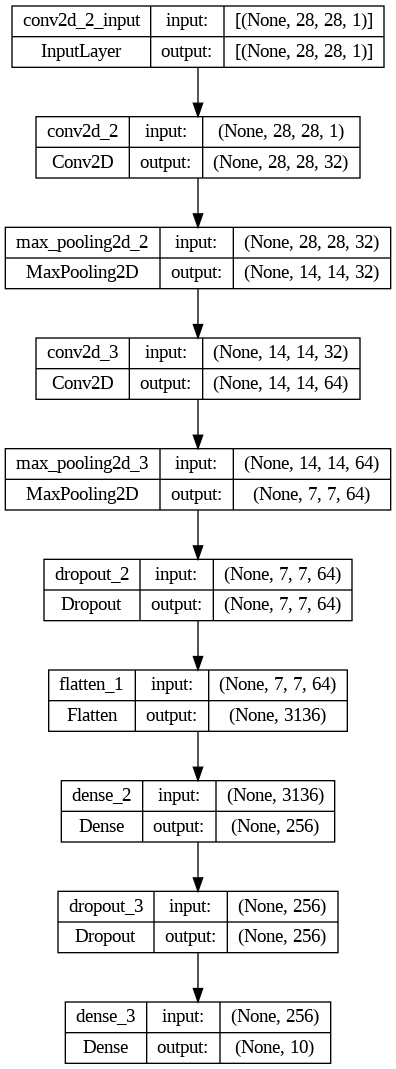

In [28]:
from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True)

In [29]:
early_stopping = keras.callbacks.EarlyStopping(patience=8,min_delta=0.001)

In [30]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
#training the model
history=model.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_val,y_val),callbacks=[early_stopping])

Epoch 1/20
375/375 [==============================] - 5s 9ms/step - loss: 0.2401 - accuracy: 0.9248 - val_loss: 0.0601 - val_accuracy: 0.9831
Epoch 2/20
375/375 [==============================] - 4s 10ms/step - loss: 0.0731 - accuracy: 0.9768 - val_loss: 0.0414 - val_accuracy: 0.9885
Epoch 3/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0563 - accuracy: 0.9827 - val_loss: 0.0346 - val_accuracy: 0.9893
Epoch 4/20
375/375 [==============================] - 4s 10ms/step - loss: 0.0427 - accuracy: 0.9870 - val_loss: 0.0325 - val_accuracy: 0.9909
Epoch 5/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0367 - accuracy: 0.9883 - val_loss: 0.0286 - val_accuracy: 0.9908
Epoch 6/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0296 - val_accuracy: 0.9909
Epoch 7/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0277 - accuracy: 0.9911 - val_loss: 0.0279 - val_accuracy: 0.9924
E

In [31]:
train_loss , train_accuracy=model.evaluate(x_train,y_train)
print(train_accuracy)
print(train_loss)
loss , accuracy=model.evaluate(x_test,y_test)
print(accuracy)
print(loss)
y_pred = model.predict(x_test)

1500/1500 [==============================] - 5s 3ms/step - loss: 0.0016 - accuracy: 0.9995
0.9995416402816772
0.0015762135153636336
313/313 [==============================] - 1s 3ms/step - loss: 0.0206 - accuracy: 0.9949
0.9948999881744385
0.02060832269489765
313/313 [==============================] - 1s 2ms/step


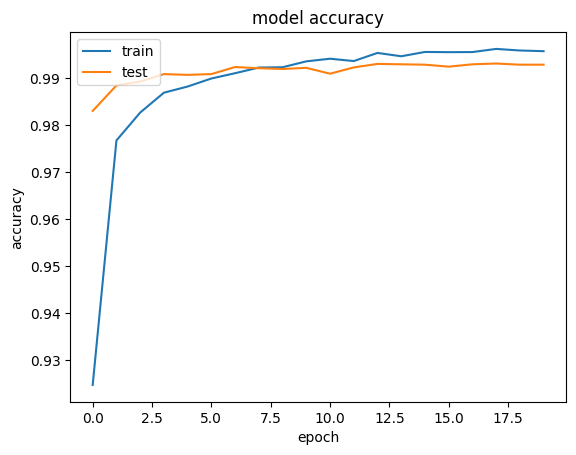

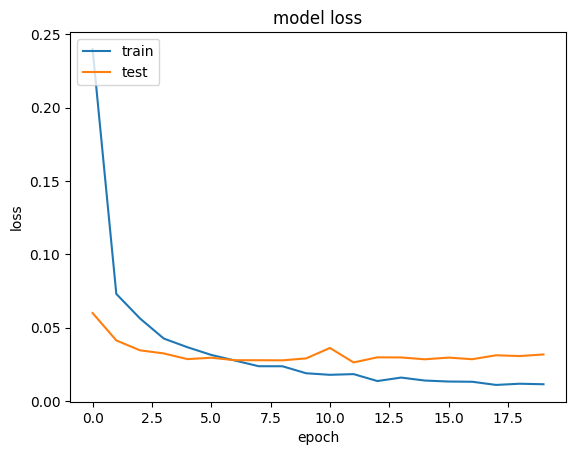

In [32]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()